<a href="https://www.kaggle.com/code/mayarmohamedswilam/salary-gender?scriptVersionId=140412665" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salarypredictions/train_dataset.csv
/kaggle/input/salarypredictions/test_dataset.csv
/kaggle/input/salarypredictions/train_salaries.csv


In [2]:
import pandas as pd

# Load the CSV files into data frames
train_dataset = pd.read_csv('/kaggle/input/salarypredictions/train_dataset.csv')
test_dataset = pd.read_csv('/kaggle/input/salarypredictions/test_dataset.csv')
train_salaries = pd.read_csv('/kaggle/input/salarypredictions/train_salaries.csv')

# Display the first few rows of each data frame to verify the data
print("Train Dataset:")
print(train_dataset.head())

print("\nTest Dataset:")
print(test_dataset.head())

print("\nTrain Salaries:")
print(train_salaries.head())


Train Dataset:
              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16  

Test Dataset:
              jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB

In [3]:
import seaborn as sns  # Import Seaborn

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_dataset.shape

(1000000, 8)

In [5]:
test_dataset.shape

(1000000, 8)

In [6]:
train_salaries.shape


(1000000, 2)

In [7]:
print("Summary of Train Data:")
print(train_dataset.info())

Summary of Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None


In [8]:
print("Summary of Test Data:")
print(test_dataset.info())

Summary of Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None


In [9]:
print("Summary of train salaries:")
print(train_salaries.info())

Summary of train salaries:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None


In [10]:
# Display summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(train_dataset.describe())


Summary Statistics of Numerical Columns:
       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         11.992386            49.529260
std           7.212391            28.877733
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000


In [11]:
# Display summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(test_dataset.describe())


Summary Statistics of Numerical Columns:
       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000


In [12]:
# Display summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(train_salaries.describe())


Summary Statistics of Numerical Columns:
               salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000


In [13]:
train_dataset.dropna(inplace=True)

In [14]:
train_dataset.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [15]:
test_dataset.dropna(inplace=True)


In [16]:
test_dataset.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [17]:
train_salaries.dropna(inplace=True)


In [18]:
train_salaries.isnull().sum()

jobId     0
salary    0
dtype: int64

In [19]:
train_dataset.drop_duplicates(inplace=True)


In [20]:
test_dataset.drop_duplicates(inplace=True)


In [21]:
train_salaries.drop_duplicates(inplace=True)

In [22]:
import matplotlib.pyplot as plt

In [23]:
train_data = pd.merge(train_dataset, train_salaries, on='jobId')

In [24]:
# Display basic information about the data
print("Summary of Train Data:")
print(train_data.info())


Summary of Train Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB
None


In [25]:
# Display summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(train_data.describe())


Summary Statistics of Numerical Columns:
       yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
max          24.000000            99.000000      301.000000


In [26]:
# Check for missing values
print(train_data.isnull().sum())

# Fill missing values with the median for 'yearsExperience' column
train_data['yearsExperience'].fillna(train_data['yearsExperience'].median(), inplace=True)

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64


In [27]:
# Perform one-hot encoding for categorical variables
train_data_encoded = pd.get_dummies(train_data, columns=['jobType', 'degree', 'major', 'industry'], drop_first=True)

In [28]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
train_data_encoded[['yearsExperience', 'milesFromMetropolis']] = scaler.fit_transform(train_data_encoded[['yearsExperience', 'milesFromMetropolis']])

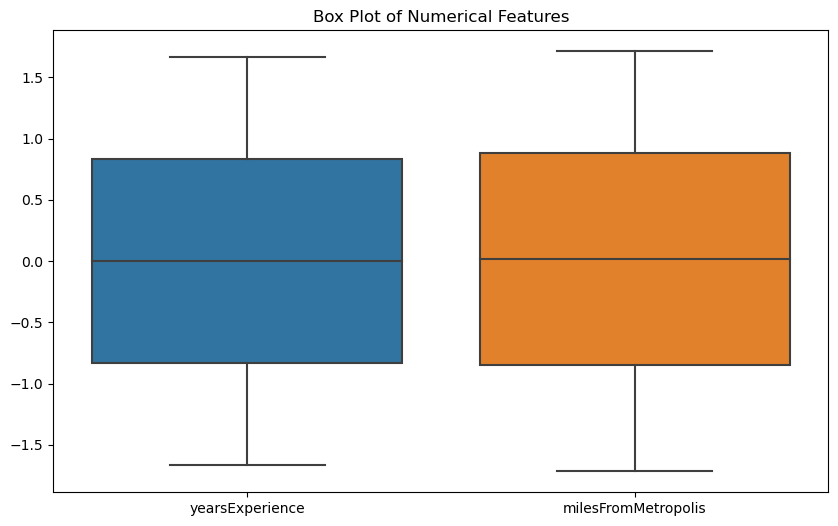

In [29]:
# Visualize box plots to identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data_encoded[['yearsExperience', 'milesFromMetropolis']])
plt.title('Box Plot of Numerical Features')
plt.show()

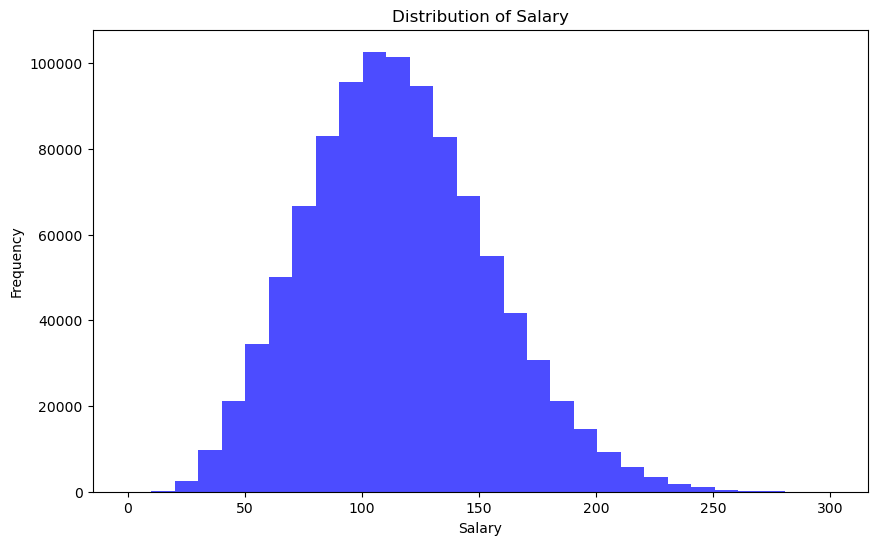

In [30]:
# Visualize the distribution of the target variable 'salary'
plt.figure(figsize=(10, 6))
plt.hist(train_data['salary'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

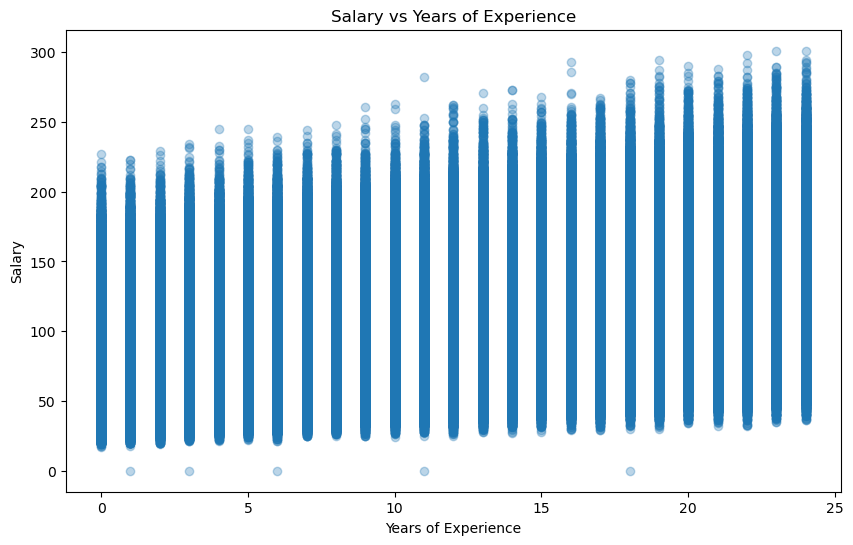

In [31]:
# Explore relationships between numerical features and the target 'salary'
plt.figure(figsize=(10, 6))
plt.scatter(train_data['yearsExperience'], train_data['salary'], alpha=0.3)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()

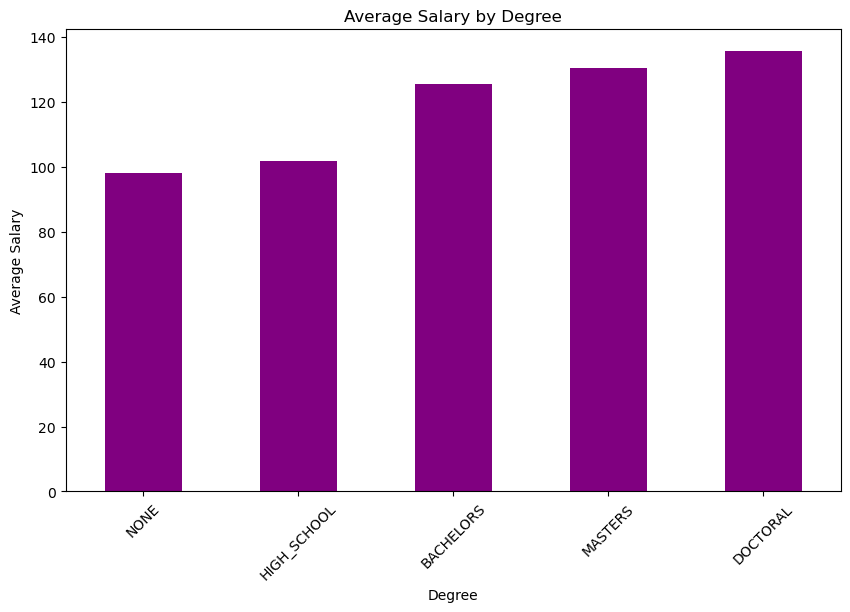

In [32]:
# Explore relationships between categorical features and the target 'salary'
plt.figure(figsize=(10, 6))
avg_salary_by_degree = train_data.groupby('degree')['salary'].mean().sort_values()
avg_salary_by_degree.plot(kind='bar', color='purple')
plt.xlabel('Degree')
plt.ylabel('Average Salary')
plt.title('Average Salary by Degree')
plt.xticks(rotation=45)
plt.show()

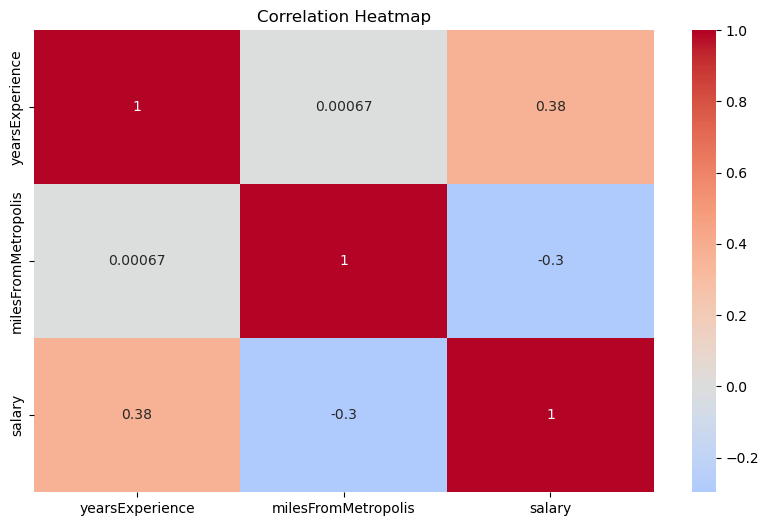

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = train_data[['yearsExperience', 'milesFromMetropolis', 'salary']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the CSV files into data frames
train_dataset = pd.read_csv('/kaggle/input/salarypredictions/train_dataset.csv')
train_salaries = pd.read_csv('/kaggle/input/salarypredictions/train_salaries.csv')

# Merge the train_dataset and train_salaries data frames based on the 'jobId'
train_data = pd.merge(train_dataset, train_salaries, on='jobId')

In [35]:
# Define features (X) and target (y)
features = train_data[['yearsExperience', 'milesFromMetropolis']]
target = train_data['salary']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)

In [36]:
# Create a linear regression model
model = LinearRegression()

In [37]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Make predictions on the validation data
predictions = model.predict(X_valid)

In [39]:
# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_valid, predictions)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1157.71


In [40]:
test_dataset = pd.read_csv('/kaggle/input/salarypredictions/test_dataset.csv')

# Define features for the test dataset
test_features = test_dataset[['yearsExperience', 'milesFromMetropolis']]

In [41]:
# Make predictions on the test data
test_predictions = model.predict(test_features)

In [42]:
# Create a new DataFrame to store the predictions
submission_df = pd.DataFrame({'jobId': test_dataset['jobId'], 'predicted_salary': test_predictions})

In [43]:
# Save the predictions to a CSV file
submission_df.to_csv('predictions.csv', index=False)